# If there's no asparagus in Innopolis...

When you find something that you like - whether it is a poem, song, or image, it's often useful to have an option to find similar items, such that you can enjoy songs of the same kind, for example. For this there exist **recommender systems**, and we will build one today. Given a dataset on nutrition of some products, you will be able to search for similar ones, e.g. for replacement in your daily meal: what if you don't have good asparagus in Innopolis?

The recommender system will be based on the vector-space model + dimensionality reduction + cosine similarity measure.

In [0]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA

## 1. Reading dataset

Next block reads the data from a CSV dataset: https://raw.githubusercontent.com/hsu-ai-course/hsu.ai/master/code/datasets/ml/nutrition.csv

You can also see this data on GitHub as a beatuful table https://github.com/hsu-ai-course/hsu.ai/blob/master/code/datasets/ml/nutrition.csv

In [2]:
# you will need internet connection for this block
csv_url = "https://raw.githubusercontent.com/hsu-ai-course/hsu.ai/master/code/datasets/ml/nutrition.csv"
dataset = pd.read_csv(csv_url)

# there are no (0) saturated fats in vegetables, that's why we replace N/A values with 0
dataset = dataset.fillna(0)

classes_list = dataset["Food Type"][1:].values
names = dataset["Food and Serving"][1:].values
dimensions = dataset.columns[1:]

print("Names:", *names[:5], "...", sep=" | ")
print()
print("Classes:", *set(classes_list), sep=" | ")
print()
print("Dimensions:", *dimensions[:5], "...", sep=" | ")

dataset.head()

Names: | Asparagus, 5 spears (93 g/3.3 oz) | Bell Pepper, 1 medium (148 g/5.3 oz) | Broccoli, 1 medium stalk (148 g/5.3 oz) | Carrot, 1 carrot, 7" long, 1 1/4" diameter (78 g/2.8 oz) | Cauliflower, 1/6 medium head (99 g/3.5 oz) | ...

Classes: | Fruits Serving Size (gram weight/ounce weight) | Seafood, Serving Size (84 g/3 oz) | Vegetables, Serving Size (gram weight/ ounce weight)

Dimensions: | Calories | Calories from Fat | Total Fat 1 | Total Fat 2 | Sodium 1 | ...


,Food and Serving,Calories,Calories from Fat,Total Fat 1,Total Fat 2,Sodium 1,Sodium 2,Potassium 1,Potassium 2,Total Carbo-hydrate 1,Total Carbo-hydrate 2,Dietary Fiber 1,Dietary Fiber 2,Sugars,Protein,Vitamin A,Vitamin C,Calcium,Iron,Saturated Fat,Saturated Fat 2,Chole-sterol 1,Chole-sterol 2,Food Type
0,0,0.0,0.0,(g),(%DV),(g),(%DV),(g),(%DV),(g),(%DV),(g),(%DV),(g),(g),(%DV),(%DV),(%DV),(%DV),(%DV),(mg),(%DV),(mg),0
1,"Asparagus, 5 spears (93 g/3.3 oz)",20.0,0.0,0,0,0,0,230,7,4,1,2,8,2,2,10,15,2,2,0,0,0,0,"Vegetables, Serving Size (gram weight/ ounce w..."
2,"Bell Pepper, 1 medium (148 g/5.3 oz)",25.0,0.0,0,0,40,2,220,6,6,2,2,8,4,1,4,190,2,4,0,0,0,0,"Vegetables, Serving Size (gram weight/ ounce w..."
3,"Broccoli, 1 medium stalk (148 g/5.3 oz)",45.0,0.0,0.5,1,80,3,460,13,8,3,3,12,2,4,6,220,6,6,0,0,0,0,"Vegetables, Serving Size (gram weight/ ounce w..."
4,"Carrot, 1 carrot, 7"" long, 1 1/4"" diameter (78...",30.0,0.0,0,0,60,3,250,7,7,2,2,8,5,1,110,10,2,2,0,0,0,0,"Vegetables, Serving Size (gram weight/ ounce w..."


## Assigning colors each food item
Building a `color_list` which attributes a color to each item.

In [3]:
classes = list(set(classes_list))
colors = ["red", "green", "blue", "black", "magenta"]
class_colors = {}
for i in range(len(classes)):
    class_colors[classes[i]] = colors[i % len(colors)]
    
print(class_colors)
color_list = [class_colors[a] for a in classes_list]

{'Fruits Serving Size (gram weight/ounce weight)': 'red', 'Seafood, Serving Size (84 g/3 oz)': 'green', 'Vegetables, Serving Size (gram weight/ ounce weight)': 'blue'}


## Plotting functions

We will use these functions to visualize data in 2D and 3D.

In [0]:
def show_points_2d(X, Y, xaxis, yaxis):
    global names, classes_list, class_colors
    plt.figure(figsize=(15,10))
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    classes = set()
    for x, y, name, label in zip(X, Y, names, classes_list):
        if not label in classes:
            plt.plot([x], [y], "o", markersize=20, color=class_colors[label], label=label)
            classes.add(label)
        else:
            plt.plot([x], [y], "o", markersize=20, color=class_colors[label])
        plt.text(x, y, name)
    plt.legend()
    plt.axvline(0)
    plt.axhline(0)
    plt.show()
    
def show_points_3d(X, Y, Z):
    global color_list
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    for x, y, z, color in zip(X, Y, Z, color_list):
        ax.scatter([x], [y], [z], marker='o', color=color)
    plt.show()
    
def show_matrix(A, xaxis, yaxis):
    plt.figure(figsize=(15,10))
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.imshow(A)
    plt.show()    

## Data Visualization
`A` will hold numerical data from dataset. It has (61 items)x(22 features) size. In "real" tasks this could be (1B users)x(300 fearures). In such case each additional feature would cost 8GB of storage. It can be a good idea to cut redundant dimensions.

Raw values, columns are objects (61, 22)


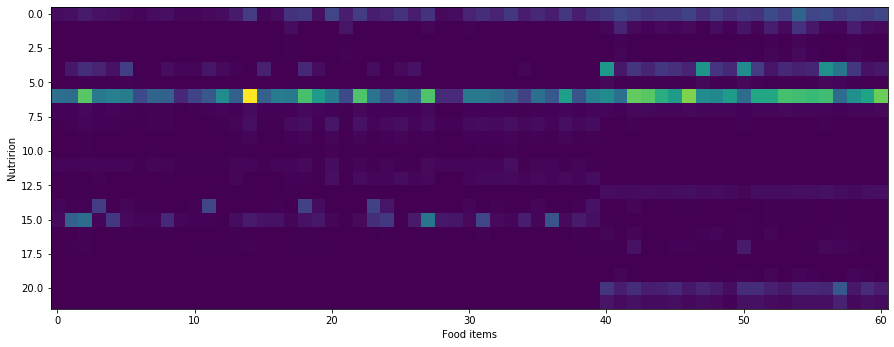

2 random dimensions distribution


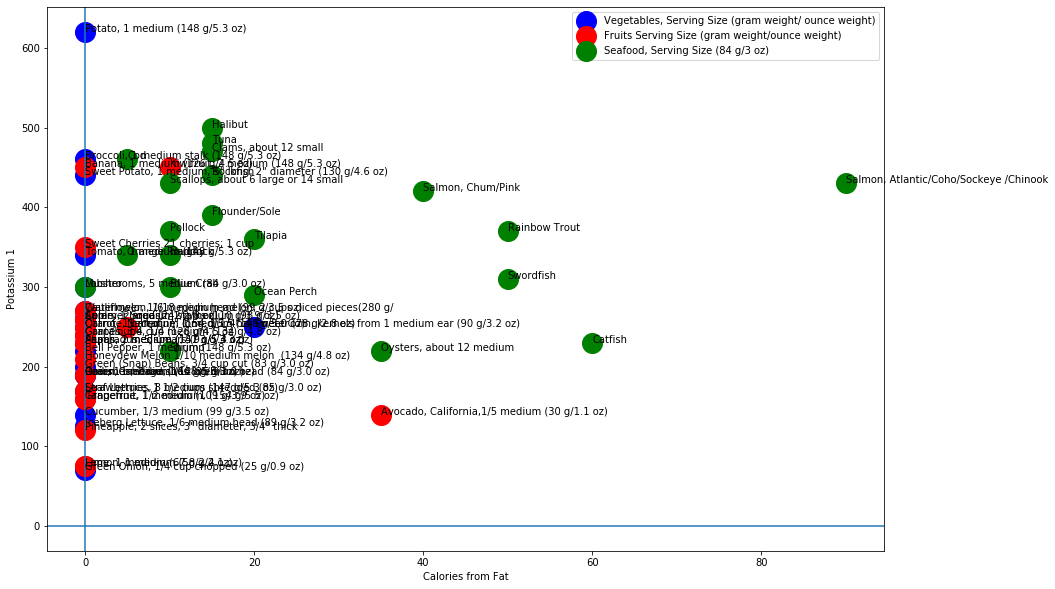

In [5]:
A = np.array(dataset.values[1:,1:-1].astype(float))
print("Raw values, columns are objects", A.shape)
show_matrix(A.T, "Food items", "Nutririon")

print("2 random dimensions distribution")
show_points_2d(A.T[1], A.T[6], dimensions[1], dimensions[6])

## Dimensionality reduction with Principal Components Analysis
Principal components are the dimensions, which express the difference in the dataset in the best way. The variance is maximized along these dimensions. Thus, we can keep only most valuable ones if we are sure they distiguish our data well. Let's keep 3 principal components. Fill in the code to apply PCA to our data.

In [6]:
k = 3
pca = PCA(n_components=k)
Ak = pca.fit_transform(A)
Ak.shape

(61, 3)

Check how much variance is explained by the first components

In [7]:
#TODO print ratios of variance explained by the first 3 components
# pca.explained_variance_ratio_.cumsum()
# plt.plot(range(k),pca.explained_variance_ratio_.cumsum())
# plt.show()
print("ratios of variance explained by the first 3 components")
print([[f'componet_{i}', j] for i, j in zip(range(k),pca.explained_variance_ratio_)])

ratios of variance explained by the first 3 components
[['componet_0', 0.568160057189618], ['componet_1', 0.24450403636922444], ['componet_2', 0.096531476166502]]


Now let's visualize the data after transformation applied

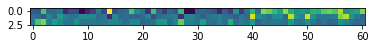

2 first dimensions


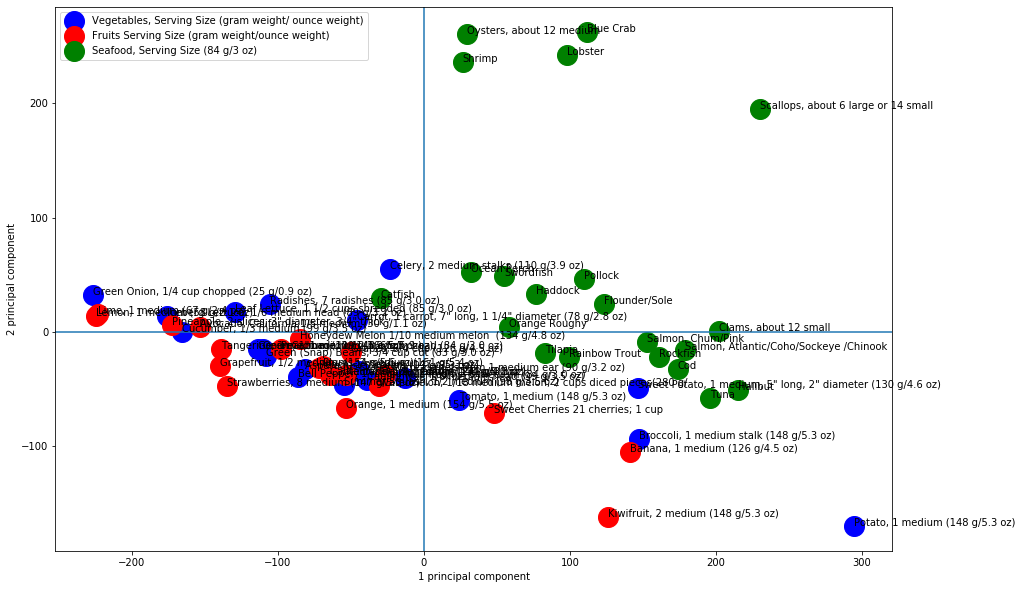

3 first dimensions


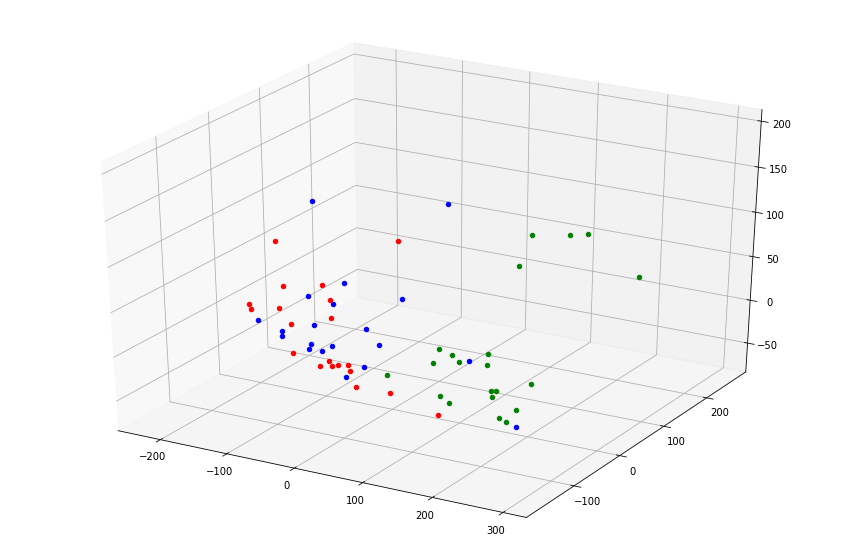

In [8]:
plt.imshow(Ak.T)
plt.show()

print("2 first dimensions")
show_points_2d(Ak.T[0], Ak.T[1], "1 principal component", "2 principal component")
print("3 first dimensions")
show_points_3d(Ak.T[0], Ak.T[1], Ak.T[2])

## Norming
It can happen, that some food is more "condenced" than the others. See, how different celery and popatos in terms of calories. Thus, the norm of each item in dataset can be different, and we cannot easily use $L_2$ norm to estimate the difference. But what we can use - [*cosine similarity*](https://en.wikipedia.org/wiki/Cosine_similarity). Cosine similarity shows, how 2 items are "about the same". Look at the formula of cosine similarity: you will find out that if both vectors are **normed**, then $cos(a, b) = a\cdot b$.

**Thus, your task is to norm the dataset vector-wise (row-wise).**

2 first dimensions


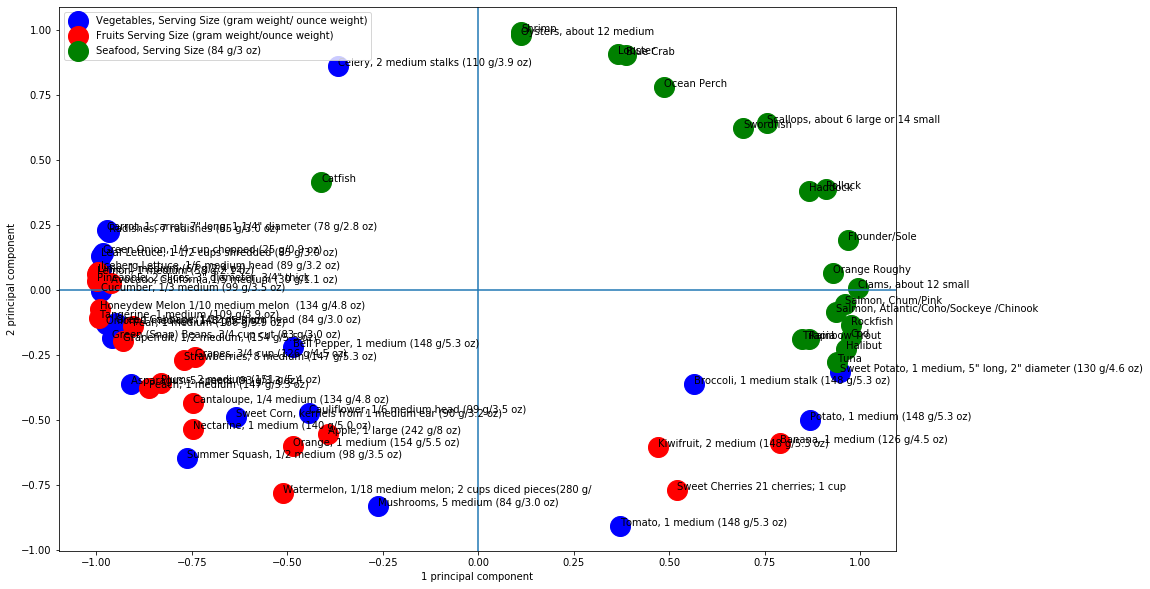

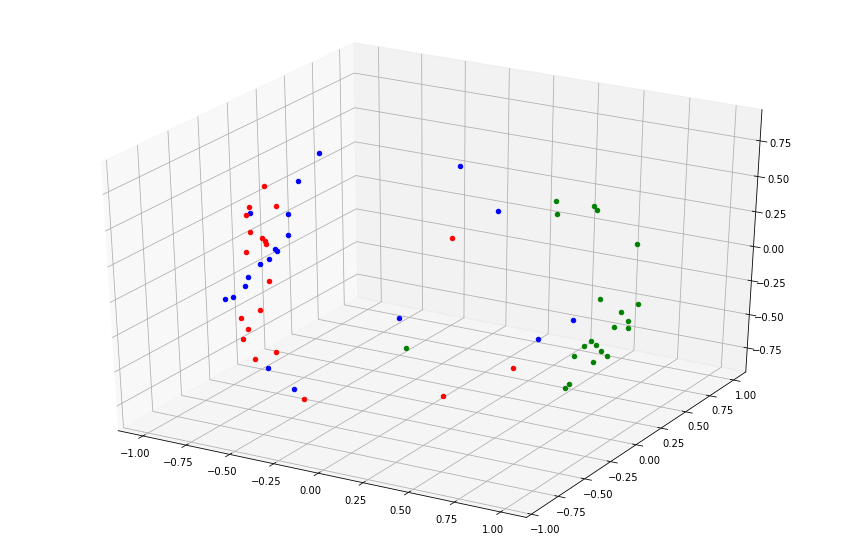

In [9]:
def norm_vectors(A):
  '''divide each row of A by its norm ||A[i]||'''
  
  An = A.copy()
  return An/np.linalg.norm(An,axis=1, keepdims=True)
    
An = norm_vectors(Ak)

print("2 first dimensions")
show_points_2d(An.T[0], An.T[1], "1 principal component", "2 principal component")
show_points_3d(An.T[0], An.T[1], An.T[2])

## Recommendations
And now the last step left. You represented the data with 3-dimensoinal vectors, instead of 22-dimensional. But we still need the code that will recommend closest food items in terms of nutrition. Please, write the code that will return $k$ closest food items to the provided query vector.

In [10]:
def find_k_closest(query, dataset, k=5):
  """find 5 closest rows in dataset in terms of cosine similarity"""

  similarities = np.dot(dataset,query)
  top_k = (-similarities).argsort()[:k+1] # exclude the query element   
  
  return [[x , y, z] for x, y, z in zip(top_k, dataset[top_k] , similarities[top_k])]


recommend_to = 0
r = find_k_closest(An[recommend_to,:], An)


print("For:", names[recommend_to])
for k, _ , p in r:
  if recommend_to != k: print("\t", names[k], "sim=", p)

For: Asparagus, 5 spears (93 g/3.3 oz)
	 Peach, 1 medium (147 g/5.3 oz) sim= 0.9900306633803702
	 Green (Snap) Beans, 3/4 cup cut (83 g/3.0 oz) sim= 0.9830960808594849
	 Plums, 2 medium (151 g/5.4 oz) sim= 0.9740244451806315
	 Onion, 1 medium (148 g/5.3 oz) sim= 0.9705752498785493
	 Pear, 1 medium (166 g/5.9 oz) sim= 0.9570755360424743


## 2. Try this on text data

Now, it's time to check how well does this work for text data. 
1. Load the inverted index you built last lab with other files needed for the task; 
2. Using these files, build Term-Document Matrix, where each row is a document, and each column is a term, and at the intersection there's a TF-IDF value;
3. Apply the same procedure as above (PCA transform + normalization). Check the amount of variance explained;
4. For a given article (print its url) show urls of the closest articles using cosine similarity;
5. Similarly, show urls of closest articles to a short query, such as "last grammy award".

Display cosine similarity for all search results along with urls.

## 2.1 Load index, documents lengths and documents urls

In [0]:
import pickle
with open('inverted_index.p', 'rb') as f:
  index = pickle.load(f)
with open('doc_lengths.p', 'rb') as f:
  doc_lengths = pickle.load(f)
with open('doc_urls.p', 'rb') as f:
  doc_urls = pickle.load(f)

## 2.2 Create Term-Document Matrix

In [0]:
n_documents = len(doc_lengths)
n_terms = len(index.keys())
columns= []
tdm = []
for term, stats in index.items():
  columns.append(term)
  temp = np.zeros(n_documents)

  idf = np.log(n_documents/len(stats[1:]))
  positions = [i  for i, _ in stats[1:]]

  v = [idf *(j/doc_lengths[i]) for i,j in stats[1:]]
  temp[positions] = v
  
  tdm.append(temp.tolist())

tdm = np.array(tdm).T

## 2.3 Dimensionality reduction with Principal Components Analysis

In [0]:
pca = PCA() #Dont set number of components to evaluate explained_variance_ratio_ and select the optimal number of components to represent the data
transformed_tdm = pca.fit(tdm)

In [14]:
import plotly.graph_objects as go

y = pca.explained_variance_ratio_.cumsum()
x = np.arange(1,len(y)+1)

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y,mode='lines+markers',name='Hello'))
fig.update_layout(title_text='Explained variance ratio',xaxis_title="Number of components",
                  yaxis_title="Ratio")
fig.show()

In [0]:
k = sum(y < 1.0) 
pca = PCA(n_components=k)
transformed_tdm = pca.fit_transform(tdm)

#normalize the vectors
normed_tdm = norm_vectors(transformed_tdm) 

# print("ratios of variance explained by the first k components")
# print([[f'componet_{i}', j] for i, j in zip(range(k),pca.explained_variance_ratio_)])

## 2.4

In [20]:
article_id = 0
res = find_k_closest(normed_tdm[article_id,:],normed_tdm)

print(f"Article with ID :{article_id} and url : {doc_urls[article_id]}")
for k, _ , p in res:
  if article_id != k : print("\t article : ",k," ,sim=", p, "url : ", doc_urls[k] )

Article with ID :0 and url : https://www.reuters.com/article/us-china-health/china-counts-economic-cost-of-virus-as-row-deepens-over-travel-ban-idUSKBN1ZX00T
	 article :  10  ,sim= 1.0000000000000004 url :  https://www.reuters.com/article/us-china-health/china-counts-economic-cost-of-virus-as-row-deepens-over-travel-ban-idUSKBN1ZX00T?il=0
	 article :  14  ,sim= 0.4291775376717127 url :  https://www.reuters.com/article/us-china-health-latest/latest-on-the-coronavirus-spreading-in-china-and-beyond-idUSKBN1ZX054?il=0
	 article :  120  ,sim= 0.4291775376717107 url :  https://www.reuters.com/article/us-china-health-latest/latest-on-the-coronavirus-spreading-in-china-and-beyond-idUSKBN1ZX054
	 article :  1  ,sim= 0.3447714446212033 url :  https://www.reuters.com/article/us-china-health-usa/china-accuses-u-s-of-scaremongering-over-coronavirus-idUSKBN1ZX0QR
	 article :  7  ,sim= 0.34477144462120235 url :  https://www.reuters.com/article/us-china-health-usa/china-accuses-u-s-of-scaremongering-o

## 2.5 Urls of closest articles to a short query

- Make Query preprocessor 
- Use BM25 to select the document to which a given query belongs. 
- Find the `k` closest documents/articles to the predicted query documnet 

In [17]:
import math

import nltk
nltk.download('punkt')

class Preprocessor:

  def __init__(self):
    self.stop_words = {'a', 'an', 'and', 'are', 'as', 'at', 'be', 'by', 'for', 'from', 'has', 'he', 'in', 'is', 'it', 'its',
                  'of', 'on', 'that', 'the', 'to', 'was', 'were', 'will', 'with'}
    self.ps = nltk.stem.PorterStemmer()

  def tokenize(self, text):
    return nltk.word_tokenize(text)

  def stem(self, word, stemmer):
    return stemmer.stem(word)

  def is_apt_word(self, word):
    return word not in self.stop_words and word.isalpha()

  def preprocess(self, text):
    tokenized = self.tokenize(text.lower())
    return [self.stem(w, self.ps) for w in tokenized if self.is_apt_word(w)]

class QueryProcessing:

  @staticmethod
  def prepare_query(raw_query):
    prep = Preprocessor()
    # pre-process query the same way as documents
    query = prep.preprocess(raw_query)
    return set(query)

  @staticmethod
  def okapi_scoring(query, doc_lengths, index, k1=1.2, b=0.75):
    scores = {}
    N = len(doc_lengths)
    avgdl = sum(doc_lengths.values()) / float(len(doc_lengths))
    for term in query:
      if term not in index: continue
      n_docs = len(index[term]) - 1
      idf = math.log10((N - n_docs + 0.5) / (n_docs + 0.5))
      postings = index.get(term)[1:]
      for posting in postings:
        doc_id = posting[0]
        doc_tf = posting[1]
        score = idf * doc_tf * (k1 + 1) / (doc_tf + k1 * (1 - b + b * (doc_lengths[doc_id] / avgdl)))
        if doc_id not in scores:
          scores[doc_id] = score
        else: 
          scores[doc_id] += score
    return scores

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
query = "last grammy award"
# query = "food nutritional support for an organism"
preprocessed_query = QueryProcessing.prepare_query(query)
okapi_res = QueryProcessing.okapi_scoring(preprocessed_query, doc_lengths, index)

#Sort results in decending order, take the document of high okapi score as query document
query_doc = sorted(okapi_res.items() ,key= lambda x : x[1],reverse=True)[0][0]

In [19]:
res = find_k_closest(normed_tdm[query_doc,:],normed_tdm)

print(f"Query : '{query}' in Article having ID :{query_doc} and url : {doc_urls[query_doc]}")
for k, _ , p in res:
  if k != query_doc : print(f"\t [Article : {k}] , [sim : {p}], [url : {doc_urls[k]}]")

Query : 'last grammy award' in Article having ID :615 and url : https://www.reuters.com/article/us-awards-grammys-ratings/grammy-awards-show-television-audience-dips-to-18-7-million-idUSKBN1ZQ2E4
	 [Article : 610] , [sim : 0.5673312124774968], [url : https://www.reuters.com/article/us-awards-grammys/billie-eilish-sweeps-grammy-awards-with-top-four-prizes-idUSKBN1ZP0DA]
	 [Article : 617] , [sim : 0.4771499394377629], [url : https://www.reuters.com/article/us-awards-grammys-winners-factbox/factbox-key-winners-at-the-2020-grammy-awards-idUSKBN1ZQ0B3]
	 [Article : 606] , [sim : 0.4562168995738906], [url : https://www.reuters.com/article/us-awards-oscars-billie-eilish/billie-eilish-to-give-special-performance-at-oscars-show-idUSKBN1ZS37S]
	 [Article : 618] , [sim : 0.42339564540665453], [url : https://www.reuters.com/article/us-awards-grammys-kobe-bryant/kobe-bryant-remembered-at-grammy-awards-hours-after-his-death-idUSKBN1ZQ02S]
	 [Article : 616] , [sim : 0.26626962120720515], [url : https